In [7]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display the first few rows
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Dataset shape and column info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
df.info()

# Basic statistics
df.describe(include='all')

Shape: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many missing values), 'Ticket', and 'Name' (not useful for analysis)
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Convert 'Sex' and 'Embarked' to categorical codes
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


/tmp/ipykernel_68785/2371820664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_68785/2371820664.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [11]:
# Survival rate by gender
survival_by_sex = df.groupby('Sex')['Survived'].mean()

# Survival rate by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# Survival rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','Young Adult','Adult','Senior'])
survival_by_age = df.groupby('AgeGroup')['Survived'].mean()

print("Survival by Sex:\n", survival_by_sex)
print("\nSurvival by Class:\n", survival_by_class)
print("\nSurvival by Age Group:\n", survival_by_age)

Survival by Sex:
 Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Survival by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival by Age Group:
 AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


/tmp/ipykernel_68785/355709240.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean()


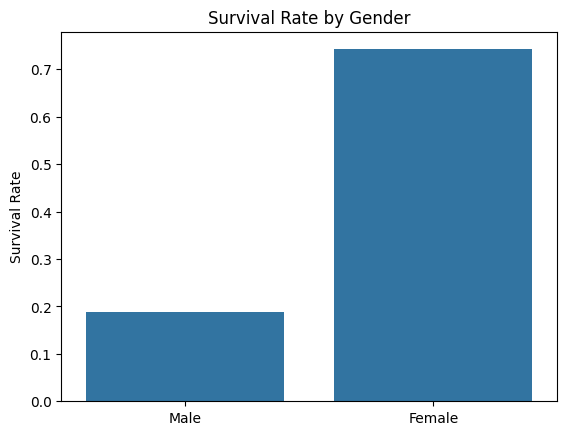

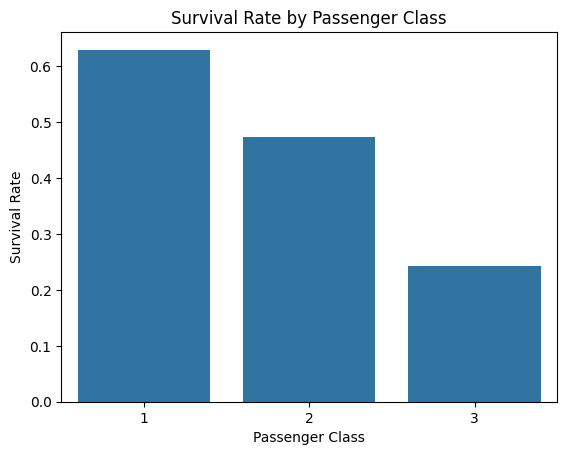

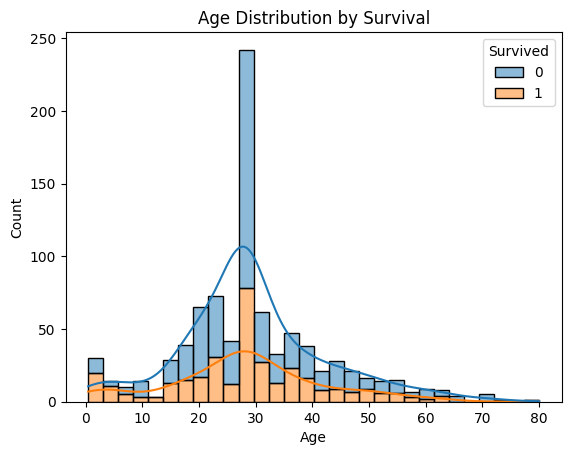

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival by Sex
sns.barplot(x=['Male', 'Female'], y=survival_by_sex.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Passenger Class
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [24]:
print(df['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [26]:
df.loc[(df['Sex'] == 0) & (df['Survived'] == 1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
17,18,1,2,0,28.0,0,0,13.0000,0,Young Adult
21,22,1,2,0,34.0,0,0,13.0000,0,Young Adult
23,24,1,1,0,28.0,0,0,35.5000,0,Young Adult
36,37,1,3,0,28.0,0,0,7.2292,1,Young Adult
55,56,1,1,0,28.0,0,0,35.5000,0,Young Adult
...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,0,32.0,0,0,56.4958,0,Young Adult
839,840,1,1,0,28.0,0,0,29.7000,1,Young Adult
857,858,1,1,0,51.0,0,0,26.5500,0,Adult
869,870,1,3,0,4.0,1,1,11.1333,0,Child


In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,0,22.0,1,0,7.2500,0,Young Adult
1,2,1,1,1,38.0,1,0,71.2833,1,Adult
2,3,1,3,1,26.0,0,0,7.9250,0,Young Adult
3,4,1,1,1,35.0,1,0,53.1000,0,Young Adult
4,5,0,3,0,35.0,0,0,8.0500,0,Young Adult
